In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import regularizers as kr
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import EarlyStopping

In [2]:
# Note: Need to use the Keras_test kernel (on dobro), which has keras etc. installs
model = Sequential()
nfilt = 1
filtlength = 5
seqlen = 600;
model.add(Conv1D(filters=nfilt, kernel_size=filtlength,kernel_initializer = 'ones',
                 input_shape=(seqlen,4), activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, kernel_initializer='ones' ,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
model0 = model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 596, 1)            21        
_________________________________________________________________
global_average_pooling1d_1 ( (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [6]:
nseqs = 64*1024
# seqs = randseq(nseqs*seqlen).reshape(nseqs,seqlen)
acgt = 'ACGT';
# acgt_to_int = dict((c,i) for i,c in enumerate(acgt))

seqs_ind = np.random.randint(0,4,(nseqs,seqlen))
seqs_onehot = to_categorical(seqs_ind)
seqs = []
for i,x in enumerate(seqs_ind):
    seqs.append(''.join([acgt[xi] for xi in x]))
# seqs_onehot = np.zeros((nseqs,seqlen,4))
# for i in range(nseqs):
#     for j in range(seqlen):
#         x = seqs[i,j]
#         seqs_onehot[i,j,acgt_to_int[x]] = 1
        
targetseq = 'CACAT' # Any sequence that contains this fragment will be methylated
methylation = np.zeros(nseqs)
for i, seq in enumerate(seqs):
    x = seq.find(targetseq)
    if x>0:
        methylation[i] = 1
np.mean(methylation)

0.442169189453125

In [4]:
# Train the model, iterating on the data in batches of 32 samples
# model = model0
callbacks = [EarlyStopping(monitor='val_loss', patience=10,mode = 'min')]
history = (model.fit(seqs_onehot, methylation, validation_split=0.25,callbacks=callbacks,
                    epochs=500, verbose=1, shuffle=False))
# pred = model.predict(seqs_onehot)

Train on 49152 samples, validate on 16384 samples
Epoch 1/500
49152/49152 [==============================] - 9s 178us/step - loss: 0.9670 - acc: 0.5068 - val_loss: 0.6852 - val_acc: 0.5637
Epoch 2/500
49152/49152 [==============================] - 8s 166us/step - loss: 0.6864 - acc: 0.5578 - val_loss: 0.6851 - val_acc: 0.5637
Epoch 3/500
49152/49152 [==============================] - 8s 167us/step - loss: 0.6863 - acc: 0.5578 - val_loss: 0.6850 - val_acc: 0.5637
Epoch 4/500
49152/49152 [==============================] - 8s 168us/step - loss: 0.6862 - acc: 0.5578 - val_loss: 0.6849 - val_acc: 0.5637
Epoch 5/500
49152/49152 [==============================] - 8s 166us/step - loss: 0.6861 - acc: 0.5578 - val_loss: 0.6848 - val_acc: 0.5637
Epoch 6/500
49152/49152 [==============================] - 8s 170us/step - loss: 0.6860 - acc: 0.5578 - val_loss: 0.6847 - val_acc: 0.5637
Epoch 7/500
49152/49152 [==============================] - 8s 172us/step - loss: 0.6859 - acc: 0.5578 - val_loss: 0.

49152/49152 [==============================] - 8s 165us/step - loss: 0.6786 - acc: 0.5672 - val_loss: 0.6778 - val_acc: 0.5739
Epoch 118/500
49152/49152 [==============================] - 8s 172us/step - loss: 0.6786 - acc: 0.5672 - val_loss: 0.6778 - val_acc: 0.5739
Epoch 119/500
49152/49152 [==============================] - 8s 171us/step - loss: 0.6786 - acc: 0.5672 - val_loss: 0.6778 - val_acc: 0.5737
Epoch 120/500
49152/49152 [==============================] - 8s 165us/step - loss: 0.6786 - acc: 0.5674 - val_loss: 0.6778 - val_acc: 0.5737
Epoch 121/500
49152/49152 [==============================] - 8s 168us/step - loss: 0.6786 - acc: 0.5676 - val_loss: 0.6777 - val_acc: 0.5739
Epoch 122/500
49152/49152 [==============================] - 8s 171us/step - loss: 0.6786 - acc: 0.5676 - val_loss: 0.6777 - val_acc: 0.5740
Epoch 123/500
49152/49152 [==============================] - 8s 165us/step - loss: 0.6785 - acc: 0.5675 - val_loss: 0.6777 - val_acc: 0.5742
Epoch 124/500
49152/49152 [

Epoch 175/500
49152/49152 [==============================] - 11s 229us/step - loss: 0.6761 - acc: 0.5733 - val_loss: 0.6754 - val_acc: 0.5807
Epoch 176/500
49152/49152 [==============================] - 11s 224us/step - loss: 0.6760 - acc: 0.5733 - val_loss: 0.6754 - val_acc: 0.5812
Epoch 177/500
49152/49152 [==============================] - 11s 225us/step - loss: 0.6760 - acc: 0.5734 - val_loss: 0.6753 - val_acc: 0.5812
Epoch 178/500
49152/49152 [==============================] - 11s 215us/step - loss: 0.6759 - acc: 0.5736 - val_loss: 0.6753 - val_acc: 0.5811
Epoch 179/500
49152/49152 [==============================] - 11s 221us/step - loss: 0.6759 - acc: 0.5737 - val_loss: 0.6753 - val_acc: 0.5812
Epoch 180/500
49152/49152 [==============================] - 11s 225us/step - loss: 0.6758 - acc: 0.5738 - val_loss: 0.6752 - val_acc: 0.5808
Epoch 181/500
49152/49152 [==============================] - 11s 228us/step - loss: 0.6758 - acc: 0.5739 - val_loss: 0.6752 - val_acc: 0.5810
Epoch 

Epoch 233/500
49152/49152 [==============================] - 11s 218us/step - loss: 0.6747 - acc: 0.5754 - val_loss: 0.6743 - val_acc: 0.5805
Epoch 234/500
49152/49152 [==============================] - 11s 231us/step - loss: 0.6747 - acc: 0.5754 - val_loss: 0.6743 - val_acc: 0.5802
Epoch 235/500
49152/49152 [==============================] - 11s 233us/step - loss: 0.6747 - acc: 0.5753 - val_loss: 0.6743 - val_acc: 0.5803
Epoch 236/500
49152/49152 [==============================] - 11s 227us/step - loss: 0.6747 - acc: 0.5753 - val_loss: 0.6743 - val_acc: 0.5803
Epoch 237/500
49152/49152 [==============================] - 11s 228us/step - loss: 0.6747 - acc: 0.5754 - val_loss: 0.6743 - val_acc: 0.5803
Epoch 238/500
49152/49152 [==============================] - 11s 229us/step - loss: 0.6747 - acc: 0.5754 - val_loss: 0.6743 - val_acc: 0.5802
Epoch 239/500
49152/49152 [==============================] - 11s 227us/step - loss: 0.6747 - acc: 0.5754 - val_loss: 0.6743 - val_acc: 0.5802
Epoch 

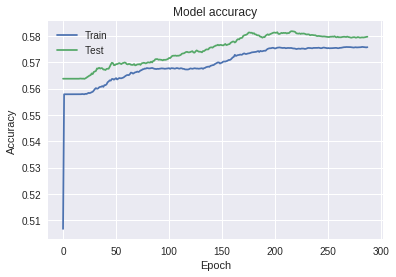

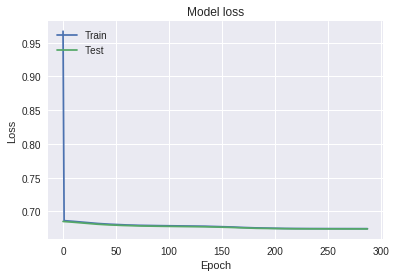

In [5]:
# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


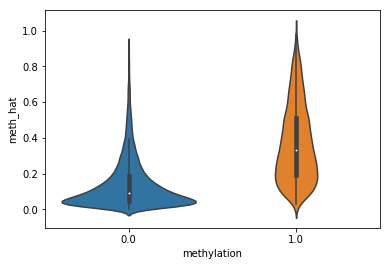

In [50]:
df = pd.DataFrame(data = {'methylation': methylation})
# df.add(seqs_onehot)
df['seqs'] = seqs
df['meth_hat'] = model.predict(seqs_onehot)
# df.boxplot(column='meth_hat', by='methylation')
ax = sns.violinplot(x="methylation", y="meth_hat", data=df)

In [60]:
# ?model.get_layer
model.get_layer(index=0).ipynb_checkpoints/

In [105]:
seqs_onehot.shape

(65536, 40, 4)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]],

In [8]:
model.predict(seqs_onehot[:20])

array([[0.29024664],
       [0.39656353],
       [0.23878776],
       [0.38545302],
       [0.31864187],
       [0.31927308],
       [0.36719388],
       [0.3081449 ],
       [0.328175  ],
       [0.29660058],
       [0.5179723 ],
       [0.4028706 ],
       [0.31554475],
       [0.32629442],
       [0.23044522],
       [0.43030715],
       [0.31042057],
       [0.3408088 ],
       [0.24864176],
       [0.2320733 ]], dtype=float32)